# Eleições Municipais 2016: Americana/SP - Vereadores

**Sobre as eleições**:

Análise de dados das eleições de Americana/SP do ano 2016.

> Objetivos:
* Entender a distribuição de votos por partido nas seções;
* Listar os partidos por votação;
* Analisar o desempenho da esquerda na votação na cidade;

> Fontes dos dados:
* [TSE - Repositório de dados eleitorais](http://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais)

## Votos para os vereadores, por setor e zona

* Data
* Hora
* Ano
* Turno
* Descrição
* Estado
* Codigo Cidade
* Cidade
* Zona
* Seção
* Id Cargo
* Legenda
* Votos

## Seções

* Zona
* Seção
* Local
* Latitude
* Longitude
* Local Seção
* Endereço
* Bairro
* Cidade

## Partidos

* Sigla
* Nome
* Legenda

In [1]:
# Carregar bibliotecas
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ipyleaflet import Map, Marker, basemaps, basemap_to_tiles, MarkerCluster

### Bases de dados

In [2]:
# Carregando dados dos votos por zona/seção
base_dados = pd.read_csv('data/votacao_secao_2016_americana_vereadores.csv', delimiter=';', encoding='latin-1')

# Carregando lista de legendas dos partidos
base_partidos = pd.read_csv('data/lista_partidos.csv', delimiter=';', encoding='latin-1')

# Carregando dados das coordenadas das seções eleitorais
base_secoes = pd.read_csv('data/locais_votacao_americana_coords.csv', delimiter=';', encoding='latin-1')

In [39]:
base_dados.head(10)

,Data,Hora,Ano,Turno,Descrição,Estado,Codigo Cidade,Cidade,Zona,Seção,Id Cargo,Cargo,Legenda,Votos
0,31/10/2016,10:26:41,2016,1,ELEIÇÕES MUNICIPAIS 2016,SP,61310,AMERICANA,384,255,13,VEREADOR,10000,1
1,31/10/2016,10:26:41,2016,1,ELEIÇÕES MUNICIPAIS 2016,SP,61310,AMERICANA,384,255,13,VEREADOR,10111,1
2,31/10/2016,10:26:41,2016,1,ELEIÇÕES MUNICIPAIS 2016,SP,61310,AMERICANA,384,255,13,VEREADOR,10123,5
3,31/10/2016,10:26:41,2016,1,ELEIÇÕES MUNICIPAIS 2016,SP,61310,AMERICANA,384,255,13,VEREADOR,10510,1
4,31/10/2016,10:26:41,2016,1,ELEIÇÕES MUNICIPAIS 2016,SP,61310,AMERICANA,384,255,13,VEREADOR,11111,6
5,31/10/2016,10:26:41,2016,1,ELEIÇÕES MUNICIPAIS 2016,SP,61310,AMERICANA,384,255,13,VEREADOR,11333,1
6,31/10/2016,10:26:41,2016,1,ELEIÇÕES MUNICIPAIS 2016,SP,61310,AMERICANA,384,255,13,VEREADOR,12000,2
7,31/10/2016,10:26:41,2016,1,ELEIÇÕES MUNICIPAIS 2016,SP,61310,AMERICANA,384,255,13,VEREADOR,12012,1
8,31/10/2016,10:26:41,2016,1,ELEIÇÕES MUNICIPAIS 2016,SP,61310,AMERICANA,384,255,13,VEREADOR,12051,3
9,31/10/2016,10:26:41,2016,1,ELEIÇÕES MUNICIPAIS 2016,SP,61310,AMERICANA,384,255,13,VEREADOR,12100,4


In [4]:
base_dados.describe()

,Ano,Turno,Codigo Cidade,Zona,Seção,Id Cargo,Legenda,Votos
count,51739.0,51739.0,51739.0,51739.000000,51739.000000,51739.0,51739.000000,51739.000000
mean,2016.0,1.0,61310.0,277.086917,153.341792,13.0,30772.933667,2.686832
std,0.0,0.0,0.0,112.837031,94.050165,0.0,19560.137068,4.128181
min,2016.0,1.0,61310.0,158.000000,1.000000,13.0,10.000000,1.000000
25%,2016.0,1.0,61310.0,158.000000,76.000000,13.0,13700.000000,1.000000
50%,2016.0,1.0,61310.0,384.000000,146.000000,13.0,25015.000000,1.000000
75%,2016.0,1.0,61310.0,384.000000,233.000000,13.0,44777.000000,3.000000
max,2016.0,1.0,61310.0,384.000000,336.000000,13.0,77777.000000,88.000000


In [5]:
base_secoes.head()

,Zona,Seção,Local,Latitude,Longitude,Local Seção,Endereço,Bairro,IdBairro,Cidade,Unnamed: 10,Unnamed: 11
0,158,307,1,-22.751364,-47.328628,CEEJA - CENTRO ESTADUAL EDUCACIONAL DE JOVENS ...,"RUA RIACHUELO, 700",VILA SANTA CATARINA,1,AMERICANA,NaN,NaN
1,158,338,1,-22.751364,-47.328628,CEEJA - CENTRO ESTADUAL EDUCACIONAL DE JOVENS ...,"RUA RIACHUELO, 700",VILA SANTA CATARINA,1,AMERICANA,NaN,NaN
2,158,235,2,-22.713992,-47.363757,CIEP PROFº ANISIO SPINOLA TEIXEIRA,"R HUMBERTO POLO, 200",PARQUE SÃO JERÔNIMO,2,AMERICANA,NaN,NaN
3,158,242,2,-22.713992,-47.363757,CIEP PROFº ANISIO SPINOLA TEIXEIRA,"R HUMBERTO POLO, 200",PARQUE SÃO JERÔNIMO,2,AMERICANA,NaN,NaN
4,158,257,2,-22.713992,-47.363757,CIEP PROFº ANISIO SPINOLA TEIXEIRA,"R HUMBERTO POLO, 200",PARQUE SÃO JERÔNIMO,2,AMERICANA,NaN,NaN


In [6]:
base_secoes.describe()

,Zona,Seção,Local,Latitude,Longitude,IdBairro,Unnamed: 10,Unnamed: 11
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,0.0,0.0
mean,281.272727,164.294949,27.937374,-22.735932,-47.324447,21.945455,NaN,NaN
std,112.645930,96.824113,15.891144,0.019037,0.027422,13.234534,NaN,NaN
min,158.000000,1.000000,1.000000,-22.774214,-47.368841,1.000000,NaN,NaN
25%,158.000000,84.500000,15.000000,-22.750428,-47.343442,10.000000,NaN,NaN
50%,384.000000,160.000000,26.000000,-22.737230,-47.330483,22.000000,NaN,NaN
75%,384.000000,247.500000,40.500000,-22.722997,-47.307567,32.000000,NaN,NaN
max,384.000000,345.000000,58.000000,-22.699306,-47.239931,47.000000,NaN,NaN


In [41]:
base_partidos.head()

,Sigla,Nome,Legenda,Espectro
0,AVANTE,AVANTE,70,C
1,DC,DEMOCRACIA CRISTÃ,27,D
2,DEM,DEMOCRATAS,25,D
3,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,15,CD
4,NOVO,PARTIDO NOVO,30,D


In [8]:
base_partidos.describe()

,Legenda
count,34.000000
mean,33.676471
std,20.300352
min,10.000000
25%,18.250000
50%,28.500000
75%,44.500000
max,90.000000


### Tratando os dados

Juntar a lista de partidos com a base de votos, ligando os dois primeiro digitos do código de vereador _ que é o número do partido.

In [9]:
# Cria um dicionário onde a Legenda vira chave e a sigla o valor.
dict_partidos = base_partidos.drop(['Nome'], axis=1).set_index('Legenda')['Sigla'].to_dict()

# dict_partidos

In [10]:
# Excluir as colunas desnecessárias, e criar novo dataframe
base_votos = base_dados.drop(['Data', 'Hora', 'Ano','Turno','Descrição', 'Estado', 'Codigo Cidade', 'Cidade', 'Id Cargo', 'Cargo'], axis=1)
base_votos.head()

,Zona,Seção,Legenda,Votos
0,384,255,10000,1
1,384,255,10111,1
2,384,255,10123,5
3,384,255,10510,1
4,384,255,11111,6


In [11]:
# Converte o número em string, pega os dois primeiros valores, que representam o número do partido, 
# depois transforma novamente em número
base_votos['nPartido'] = base_votos['Legenda'].apply(str).str[:2].apply(int)

# Associa o código do partido com o dicionário
base_votos['Sigla'] = base_votos['nPartido'].map(dict_partidos)

# Associa o espectro e o adiciona ao dataframe
#base_votos['Partido'] = base_votos.nPartido.map(base_partidos.Sigla)
base_votos['Espectro'] = base_votos.nPartido.map(base_partidos.Espectro)

In [12]:
base_votos.head()

,Zona,Seção,Legenda,Votos,nPartido,Sigla,Espectro
0,384,255,10000,1,10,PRB,C
1,384,255,10111,1,10,PRB,C
2,384,255,10123,5,10,PRB,C
3,384,255,10510,1,10,PRB,C
4,384,255,11111,6,11,PP,CD


<h2 style="color:red"> Partidos e espectro político </h2>

**1) Qual a quantidade de votos por partido?**

In [13]:
# Soma de votos por partidos
grupo_votos_partido = base_votos.groupby(['Sigla'], sort=False)['Votos'].sum().reset_index()

In [14]:
grupo_votos_partido.sort_values(by = ['Votos', 'Sigla'], ascending=[False,True])

,Sigla,Votos
4,MDB,19103
15,PSDB,13988
14,PV,10925
2,PDT,9975
19,PCdoB,9548
9,PL,6289
3,PT,6252
18,PSD,6041
0,PRB,4753
12,PHS,3119


**Mostrar no gráfico os 10 partidos com mais votos**

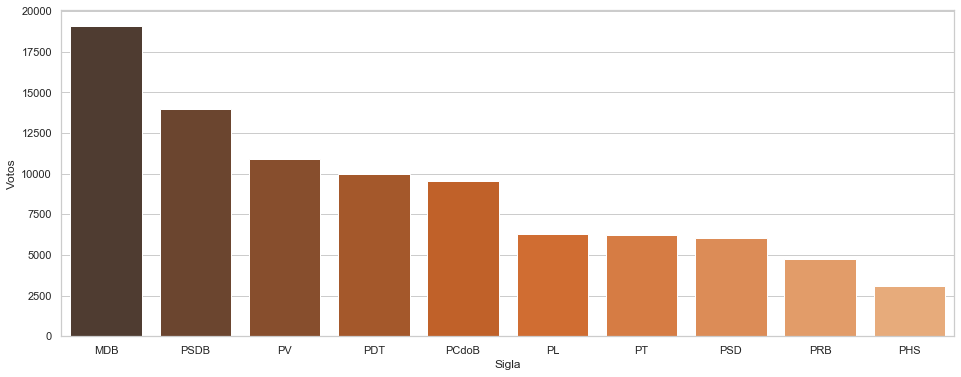

In [43]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
sns.barplot(
    x='Sigla', 
    y='Votos', 
    data=grupo_votos_partido.sort_values(by = ['Votos', 'Sigla'], ascending=[False,True]).head(10),
    palette=("Oranges_d")
)

**2) Qual a quantidade de vereadores que receberam votos por partido?**

In [16]:
# Agrupando legendas por partido, excluindo-se as duplicadas. 
grupo_votos_vereadores = base_votos.groupby("Sigla").agg({"Legenda": pd.Series.nunique})

# Criar coluna com novos índices
grupo_votos_vereadores.reset_index(inplace=True)

In [17]:
grupo_votos_vereadores.sort_values(by = ['Legenda', 'Sigla'], ascending=[False, True])

,Sigla,Legenda
1,MDB,30
19,PV,30
6,PL,29
15,PSDB,29
17,PT,29
3,PCdoB,24
4,PDT,24
14,PSD,22
5,PHS,21
11,PRB,21


**Os 10 partidos que mais receberam votos**

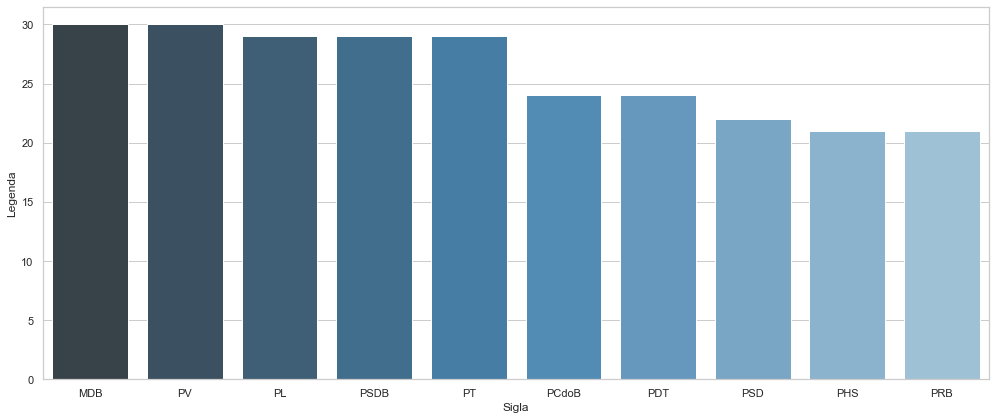

In [18]:
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
#sns.set_context('talk')

sns.barplot(
    x='Sigla', 
    y='Legenda', 
    data=grupo_votos_vereadores.sort_values(by = ['Legenda', 'Sigla'], ascending=[False,True]).head(10),
    palette=("Blues_d")
)

plt.tight_layout()
#fig.savefig('images/nota_media_ensino_medio_nacional.png')


**Os 10 partidos que menos receberam votos**

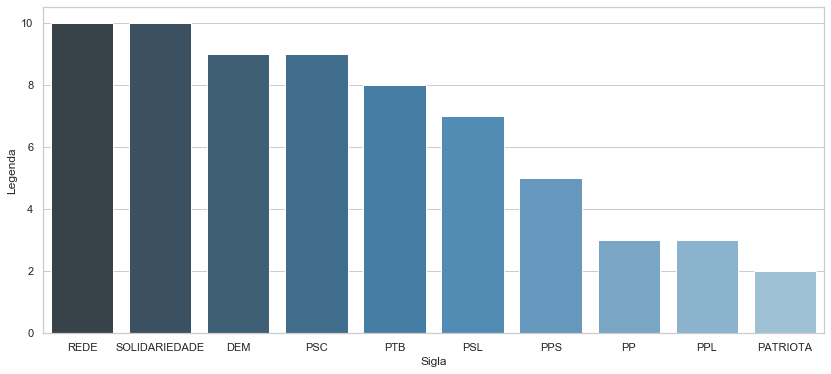

In [19]:
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
#sns.set_context('talk')

sns.barplot(
    x='Sigla', 
    y='Legenda', 
    data=grupo_votos_vereadores.sort_values(by = ['Legenda', 'Sigla'], ascending=[False,True]).tail(10),
    palette=("Blues_d")
)

**3) Qual a distribuição dos votos por espectro político?**

In [20]:
# Soma de votos por partidos
grupo_votos_espectro = base_votos.groupby(['Espectro'], sort=False)['Votos'].sum().reset_index()

In [21]:
grupo_votos_espectro.sort_values(by = ['Votos', 'Espectro'], ascending=[False,True])

,Espectro,Votos
2,D,33104
0,C,10019
4,ED,8977
3,E,6252
1,CD,3422


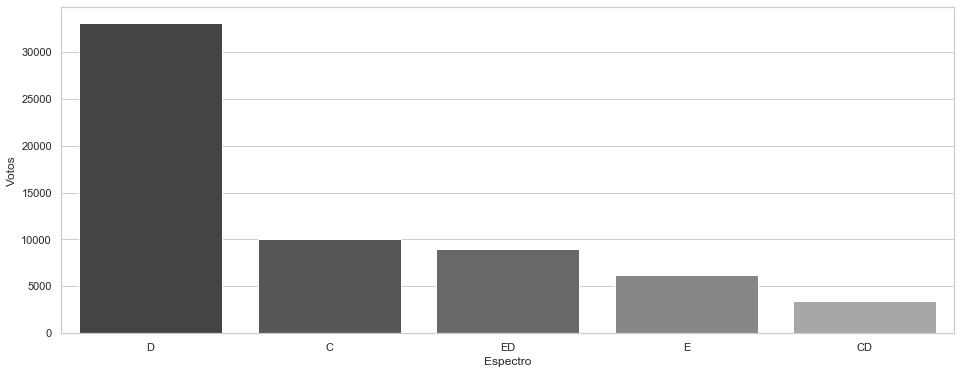

In [22]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
sns.barplot(
    x='Espectro', 
    y='Votos', 
    data=grupo_votos_espectro.sort_values(by = ['Votos', 'Espectro'], ascending=[False,True]).head(10),
    palette=("Greys_d")
)

<h2 style="color:red"> Seções e bairros </h2>

* Quais as 10 seções que mais tiveram votos?
* Quais as 10 seções que menos tiveram votos?
* Quais a quantidade de votos por bairro?
* Qual a distribuição de votos por partido e por bairro?

**1) Qual a distribuição de voto por seções?**

As seções não nos dizem muito sobre a distribuição dos votos, a diferença de votos entre elas é muito pequena. Talvez esteja relacionado com a distribuição do eleitorado em seções pelo TSE. Mas o que pode nos ajudar mais adiante, é entender a distribuição de votos por partido nos bairros.

In [23]:
base_votos.head()

,Zona,Seção,Legenda,Votos,nPartido,Sigla,Espectro
0,384,255,10000,1,10,PRB,C
1,384,255,10111,1,10,PRB,C
2,384,255,10123,5,10,PRB,C
3,384,255,10510,1,10,PRB,C
4,384,255,11111,6,11,PP,CD


In [24]:
grupo_zona_secao = base_votos.groupby(['Zona', 'Seção'], sort=True)['Votos'].sum().reset_index()

In [25]:
grupo_zona_secao.sort_values(by = ['Votos', 'Seção', 'Zona'], ascending=[False,True, True]).head(10)
#grupo_zona_secao.sort_values(by = ['Votos', 'Seção', 'Zona'], ascending=[False,True, True]).tail(10)

,Zona,Seção,Votos
317,384,101,359
468,384,255,359
124,158,243,358
371,384,155,357
305,384,89,356
275,384,59,353
400,384,184,353
431,384,215,351
427,384,211,350
388,384,172,349


In [26]:
grupo_zona_secao.describe()

,Zona,Seção,Votos
count,471.000000,471.000000,471.000000
mean,279.876858,156.836518,295.146497
std,112.770572,93.931238,45.014818
min,158.000000,1.000000,52.000000
25%,158.000000,79.000000,282.000000
50%,384.000000,150.000000,302.000000
75%,384.000000,237.000000,322.000000
max,384.000000,336.000000,359.000000


In [27]:
base_votos_secao = pd.merge(grupo_zona_secao, base_secoes,  how='left', left_on=['Zona','Seção'], right_on = ['Zona','Seção'])

In [28]:
base_votos_secao.head()

,Zona,Seção,Votos,Local,Latitude,Longitude,Local Seção,Endereço,Bairro,IdBairro,Cidade,Unnamed: 10,Unnamed: 11
0,158,1,260,22.0,-22.739526,-47.351437,FACULDADE DE TECNOLOGIA (FATEC),"RUA EMILIO DE MENEZES, S/N GLEBA B",VILA AMORIM,19.0,AMERICANA,NaN,NaN
1,158,2,281,22.0,-22.739526,-47.351437,FACULDADE DE TECNOLOGIA (FATEC),"RUA EMILIO DE MENEZES, S/N GLEBA B",VILA AMORIM,19.0,AMERICANA,NaN,NaN
2,158,3,264,22.0,-22.739526,-47.351437,FACULDADE DE TECNOLOGIA (FATEC),"RUA EMILIO DE MENEZES, S/N GLEBA B",VILA AMORIM,19.0,AMERICANA,NaN,NaN
3,158,4,263,22.0,-22.739526,-47.351437,FACULDADE DE TECNOLOGIA (FATEC),"RUA EMILIO DE MENEZES, S/N GLEBA B",VILA AMORIM,19.0,AMERICANA,NaN,NaN
4,158,5,274,22.0,-22.739526,-47.351437,FACULDADE DE TECNOLOGIA (FATEC),"RUA EMILIO DE MENEZES, S/N GLEBA B",VILA AMORIM,19.0,AMERICANA,NaN,NaN


In [29]:
base_votos_secao.groupby(
    ['Bairro'], sort=True
    )['Votos'].sum().reset_index().sort_values(
    by = ['Votos', 'Bairro'], ascending=[False,True]
    )

,Bairro,Votos
5,CIDADE JARDIM II,7570
4,CENTRO,6701
1,ANTONIO ZANAGA I,6059
19,JARDIM SANTANA,5167
46,VILA SANTA CATARINA,4447
27,PARQUE GRAMADO,4246
37,VILA AMORIM,4230
44,VILA MATHIENSEN,4136
8,JARDIM AMERICA,4103
40,VILA GALO,4063


In [30]:
center = (52.204793, 360.121558)

m = Map(center=center, zoom=15)

marker = Marker(location=center, draggable=True)
m.add_layer(marker);

display(m)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [31]:
m = Map(center=(52.204793, 360.121558), zoom=9)

dark_matter_layer = basemap_to_tiles(basemaps.CartoDB.DarkMatter)
m.add_layer(dark_matter_layer)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [32]:
m = Map(center=(50, 0), zoom=5)

marker1 = Marker(location=(48, -2))
marker2 = Marker(location=(50, 0))
marker3 = Marker(location=(52, 2))

marker4 = Marker(location=(43, -2))
marker5 = Marker(location=(45, 0))
marker6 = Marker(location=(56, 2))

tup = [marker1, marker2, marker3]

marker_cluster = MarkerCluster(
    markers=(tup)
)

m.add_layer(marker_cluster);

m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

**Localizando as seções dentro da cidade de Americana**

In [33]:
# Eliminando os endereços duplicados, e colunas erradas
locais_votacao = base_secoes.drop_duplicates(subset="Local").drop(['Zona', 'Seção', 'Cidade'],axis=1).reset_index()
locais_votacao.drop(['index','Unnamed: 10', 'Unnamed: 11'], axis=1, inplace=True)

In [34]:
locais_votacao.head()

,Local,Latitude,Longitude,Local Seção,Endereço,Bairro,IdBairro
0,1,-22.751364,-47.328628,CEEJA - CENTRO ESTADUAL EDUCACIONAL DE JOVENS ...,"RUA RIACHUELO, 700",VILA SANTA CATARINA,1
1,2,-22.713992,-47.363757,CIEP PROFº ANISIO SPINOLA TEIXEIRA,"R HUMBERTO POLO, 200",PARQUE SÃO JERÔNIMO,2
2,3,-22.750728,-47.359070,COLEGIO ANTARES,"R ICARAI, 100",JARDIM IPIRANGA,3
3,4,-22.737230,-47.330483,COLEGIO COMERCIAL DOM PEDRO II,"R DR HEITOR PENTEADO, 8",CENTRO,4
4,5,-22.748206,-47.323799,E.E. DR. JOÃO DE CASTRO GONÇALVES,"RUA TIBIRIÇÁ, 449",CONSERVA,5


In [35]:
m = Map(center=(-22.737593, -47.333593), zoom=5) # centralizar no centro de Americana

list = []
x = []
for i,j in zip(locais_votacao['Latitude'], locais_votacao['Longitude']):
    #print('Latitude:', i)
    #print('Longitude:', j)
    x = Marker(location=(i, j))
    list.append(x)
    
marker_cluster = MarkerCluster(
    markers=(list)
)  

m.add_layer(marker_cluster);

m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …